<a href="https://colab.research.google.com/github/phillipinseoul/Face_Recognizer/blob/main/FaceDetector_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload image to Google Colab
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with {length} bytes'.format(
      name=fn, length=len(uploaded[fn])
  ))

In [ ]:
# Face Recognition using TensorFlow
# https://github.com/ageitgey/face_recognition
# Demo: https://deepnote.com/project/77d75697-feea-44ca-9db3-e01371b0eb95#%2Fexample.ipynb

from PIL import Image, ImageDraw
from IPython.display import display

# Picture used for face detection
pil_im = Image.open('conan_test1.jpg')
display(pil_im)

In [ ]:
!pip install face_recognition

In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Learn to recognize Conan
conan_image = face_recognition.load_image_file("conan.jpg")
conan_face_encoding = face_recognition.face_encodings(conan_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
      conan_face_encoding
]

known_face_names = [
      "Conan O'brien"
]

print("Learned encoding for", len(known_face_encodings), "images.")

Learned encoding for 1 images.


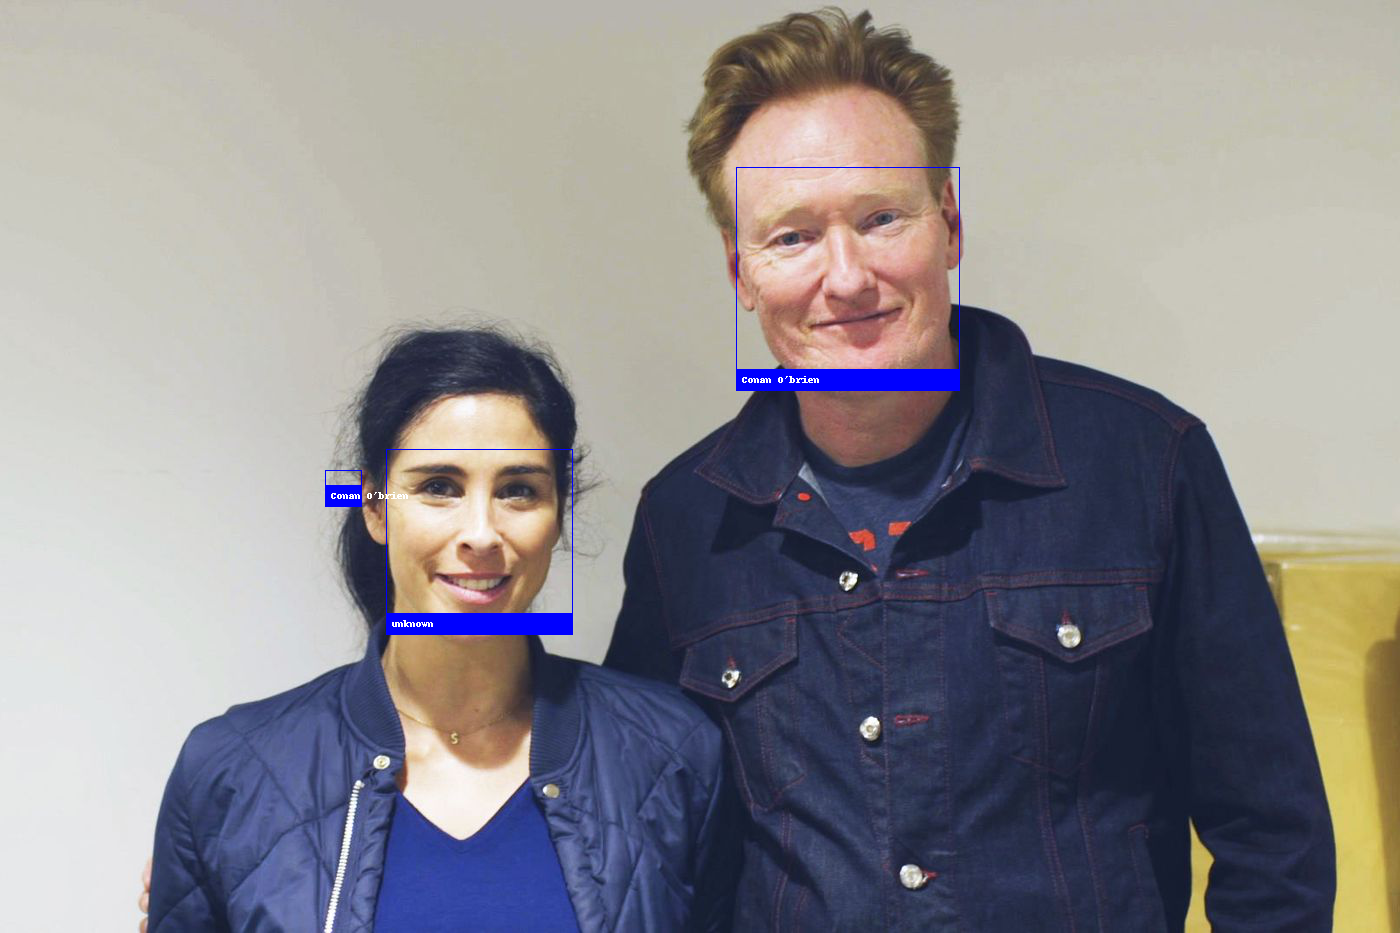

In [ ]:
### Test ###
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("conan_test2.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
  # See if the face is a match for the known faces
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

  name = "unknown"

  # Or instead, use the known face with the smallest distance to the new face
  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]

  # Draw a box around the face using the Pillow module
  draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

  # Draw a label with a name below the face
  text_width, text_height = draw.textsize(name)
  draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
  draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)
